# Numerical Integration 1: Trapezoid Rule

This tutorial is the first in a series on numerical computation. The goal of this tutorials is to outline and define the key concepts of and present pseudo code for numerical integration for applications of signal processing and control theory in smart contracts. 

In mathematical analysis, numerical integration consists of a broad family of algorithms for calculating the numerical value of an integral, and by extension, is sometimes used to describe the numerical solution of differential equations. Integrals are typically denoted as follows, a and b being limits to the integration, $f(x)$ being the function being integrated (see equation below):

$$\int_{a}^b f(x)dx$$

![](https://i.imgur.com/9le44ab.png)
source: https://en.wikipedia.org/wiki/Integral and https://en.wikipedia.org/wiki/Numerical_integration


# What are Integrals?
Integrals can be used to find areas, volumes, central points and many useful things; and are used practically in Engineering, Economics, and Physics. Please read through the following article for a background or refresher on integration: https://www.mathsisfun.com/calculus/integration-introduction.html

### Definitions for this tutorial

Let us consider a signal of interest $y_t$ which takes values in continuous time $t$. As is often the case, we wish to integrate over error functions, so let us further define a target signal $y^*_t$ and focus our attention on the error $e_t = y^*_t - y_t$.


### Signed Integration

We use the [Trapezoid Rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) to calculate an integral numerically by approximating the region under the graph of the function as a trapezoid and calculating its area, as shown below:

$\int _{a}^{b}f(x)\,dx\approx (b-a)\cdot {\tfrac {f(a)+f(b)}{2}}$

The trapezoidal rule may be viewed as the result obtained by averaging the left and right Riemann sums, and is sometimes defined this way. The integral can be even better approximated by partitioning the integration interval, applying the trapezoidal rule to each subinterval, and summing the results. In practice, this "chained" (or "composite") trapezoidal rule is usually what is meant by "integrating with the trapezoidal rule".T he approximation becomes more accurate as the resolution of the partition increases (that is, for larger $N$, $\Delta x_{k}$ decreases). When the partition has a regular spacing, as is often the case, the formula can be simplified for calculation efficiency.

For more details and alternatives see: [wikipedia](https://en.wikipedia.org/wiki/Numerical_integration) or [Lecture Notes](https://www.whitman.edu/mathematics/calculus_online/section08.06.html)

![](https://i.imgur.com/MZjWN8S.png)


### Rectangle Equivalence or Riemann sum
The rectangle method (also called the midpoint rule) is the simplest method in Mathematics used to compute an approximation of a definite integral. - http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/07/rectangle-method.html

In mathematics, a Riemann sum is a certain kind of approximation of an integral by a finite sum. It is named after nineteenth century German mathematician Bernhard Riemann. One very common application is approximating the area of functions or lines on a graph, but also the length of curves and other approximations.

The sum is calculated by partitioning the region into shapes (rectangles, trapezoids, parabolas, or cubics) that together form a region that is similar to the region being measured, then calculating the area for each of these shapes, and finally adding all of these small areas together. This approach can be used to find a numerical approximation for a definite integral even if the fundamental theorem of calculus does not make it easy to find a closed-form solution. 

A Riemann sum $S$ of $f$ over $I$ with partition $P$ is defined as
$S = \sum_{i=1}^{n} f(x_i^*)\, \Delta x_i$
where $\Delta x_i=x_i-x_{i-1}$ and $x_i^*\in[x_{i-1},x_i]$

For more details and source material, [see](http://www.mathcs.emory.edu/~cheung/Courses/170/Syllabus/07/rectangle-method.html) and [wikipedia](https://en.wikipedia.org/wiki/Riemann_sum)

![](https://i.imgur.com/OjdT4F8.png)


To translate into code, we will work through pseudo code first, as shown below:

#### Pseudo-code

---

0. Given Priors: $(I_t, e_t)$

1. A new Sample arrives:  $(\Delta t, e_{t+\Delta t})$

2. Compute the area: $A_t = \frac{ e_t+e_{t+\Delta t}}{2}\Delta t$

3. Update the Integral: $I_{t+\Delta t} = I_t + A_t$


0. Recurse with new priors: $(I_{t+\Delta t}, e_{t+\Delta t})$

---

*Implementation note*: you can get away with storing only one value for $I_t$, replacing $I_t$ with $I_{t+\delta t}$ in step 3. You must to maintain two values of $e_t$, but it suffices to slide track `new_error` and `old_error`. When making the new observation $e_{t+\Delta t}$, first store the previous `new_error` as `old_error` (in effect dropping the previous old error), then set the new observation as `new_error`.

```
For some OBSERVATION = {'error':value1, 'Dt':value2}

Given: (old_error, new_error,integral_value)

old_error = new_error
new_error = OBSERVATION[error]

delta_time = OBSERVATION[Dt]
mean_error = (new_error + old_error)/2

area = delta_time * mean_error

integral_value = integral_value + area
```

Below is an example over 3 updates that matches with the diagrams above.

![](https://i.imgur.com/YhBXZRb.png)

note that we observe $e_{t+\Delta t}$ in order to compute $A_t$ which is in turn used to compute the update $I_{t+\Delta t}$.


These integration methods are [Reimann Sums](https://en.wikipedia.org/wiki/Riemann_sum) but one can use left-hand, right-hand, midpoint, and trapezoid variants. We've used the trapezoid rule in the above.

### Leaky Integration

Rather than accumulate forever, we have the option of allowing the integral to decay at the rate $\alpha$. A leaky integrator equation is a specific differential equation, used to describe a component or system that takes the integral of an input, but gradually leaks a small amount of input over time. It appears commonly in hydraulics, and electronics. - https://en.wikipedia.org/wiki/Leaky_integrator

This is done by replacing the integral update with the following:
```
decay_factor = alpha**delta_time
integral_value = decay_factor*integral_value + area
```


A visual representaion of the leaky integral is a "leaky bucket", where the bucket is retaining $\alpha \in[0,1]$ or losing $(1-\alpha)$ fraction of its content per unit of time. 


![](https://i.imgur.com/9LPrb5l.png)



This is particularly important if there is steady state error. Suppose
$$\lim_{t\rightarrow \infty} e_t = e^*$$

then the true integrator diverges. However, the leaky integrator will still converge
$$\lim_{t\rightarrow \infty} I_t = - \frac{e^*}{\ln(\alpha)}$$

Noting that $\alpha \in (0,1)$ implies $\ln(\alpha)<0$, so the expression above is the same sign as $e^*$.

### Setting Alpha

Alpha = 1, equivalent to standard integral


Technically it is legal to set $\alpha=0$ at which point this system simply $y_{t+1}=x_t$. Although $x_t$ can still vary overtime, there is no accumulation. The choice of $\alpha>0$ is made to create a "leaky integrator", as discussed above.

Half-life intepretation of alpha. Half-life $T$ such that $\alpha^T = \frac{1}{2}$ is given by $T = -log_\alpha(2) = -\frac{\ln(2)}{\ln(\alpha)}$.

See [the Aragon Conviction Voting BlockScience project](https://nbviewer.jupyter.org/github/BlockScience/Aragon_Conviction_Voting/blob/master/models/v3/Deriving_Alpha.ipynb) for a thorough walkthrough of an applied alpha half life decay use case.

## Examples

In our cadCAD model simulation results, we will illustrate the Trajectors, and Rectangles via simulation plots. Our cadCAD simulation has the folllowing file structure:

* numerical_integration.ipynb
* model
In the model folder there exist 5 files and a parts folder, the [config.py](model/config.py), [partial_state_update_block.py](model/partial_state_update_block.py), [run.py](model/run.py), and [state_variables.py](model/state_variables.py), and [sys_params.py](model/sys_params.py). The *config.py* contains the simulation configurations, aggregating the partial states, and the state variables. The *partial_state_update_block.p*y contains the partial state update blocks and how they update the state variables. *state_variables.py* defines the state variables, *sys_params.py* defines global and initial parameters of the system, and run.py actually runs the simulation.

The mechanisms of the model live within the parts subfolder as:

* [system.py](model/parts/system.py)


## Note:
When running this notebook simulation, be sure to run from "Kernal" -> "Restart & Run All"


## Schema of the states
The model consists of a price and target states as intergarers, error as a dictionary of error values, leaky integral and integral as ints, DT as seconds, and timestamp as a timestamp.


```
genesis_states = {
    'price': int(initial_values['TOK']), 
    'target': int(initial_values['TOK']), 
    'error': {'new':0, 'old':0}, 
    'leaky_integral': 0,
    'integral': 0,  
    'Dt': 0, #seconds
    'timestamp': dt.datetime.now() #date
}
```

### System Parameters
```
sys_params = {
    'expected_lag': [10],
    'minimum_period': [initial_values['SPH']],
    'correction_wt': [0.5],
    'noise_wt': [0.001],
    'alpha': [alpha],
    'TOK':[initial_values['TOK']],
}
```

The system consists of 100 time steps with no monte carlo runs.

## Partial State Update Blocks
Each partial state update block is kind of a like a phase in a phased based board game. Everyone decides what to do and it reconciles all decisions. One timestep is a full turn, with each block being a phase of a timestep or turn. We will walk through the individaul partial state update blocks one by one below.

```
partial_state_update_block = [
    {
        # system.py
        'policies': {
            'update_event': event
        },
        'variables': {
            'error': store_error,
            'timestamp':time_move,
            'Dt': store_Dt
        }
    },
    {
        'policies': {
        },
        'variables': {
            'leaky_integral': update_leaky_integral,
            'integral': update_integral,
        }
    },
    {
        'policies': {
            'martingale': martingale        
        },
        'variables': {
            'price': price_move,
        }
    },
]
```
Lets run our simulation below:

In [1]:
# Dependences
import pandas as pd
import numpy as np
import inspect

# Experiments
from model import run
from model import sys_params 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 6, 1, 7)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.08s


In [2]:
df.head()

,price,target,error,leaky_integral,integral,Dt,timestamp,simulation,subset,run,substep,timestep
0,1000000000000000000000000000,1000000000000000000000000000,"{'new': 0, 'old': 0}",0.00,0.00,0.00,2020-09-28 14:52:43.685659,0,0,1,0,0
1,1000000000000000000000000000,1000000000000000000000000000,"{'new': 0, 'old': 0}",0.00,0.00,3604.00,2020-09-28 15:52:48.182629,0,0,1,1,1
2,1000000000000000000000000000,1000000000000000000000000000,"{'new': 0, 'old': 0}",0.00,0.00,3604.00,2020-09-28 15:52:48.182629,0,0,1,2,1
3,1001375771365964522037706752,1000000000000000000000000000,"{'new': 0, 'old': 0}",0.00,0.00,3604.00,2020-09-28 15:52:48.182629,0,0,1,3,1
4,1001375771365964522037706752,1000000000000000000000000000,"{'new': 1375771365964522037706752, 'old': 0}",0.00,0.00,3627.00,2020-09-28 16:53:16.015026,0,0,1,1,2


After we run the simulation, certain post processing steps should be taken, as shown below:

In [3]:
from model.run import postprocessing
function = inspect.getsource(postprocessing)
print(function)

def postprocessing(df):
    '''
    Definition:
    Refine and extract metrics from the simulation
    
    Parameters:
    df: simulation dataframe
    '''

    #rdf = df[df.substep == df.substep.max()]
    rdf = df[df.substep<=1]
    rdf = rdf.drop_duplicates(subset=['simulation','run', 'substep', 'timestep'])
    
    rdf['normed_integral'] = rdf.integral.apply(lambda x: x/(initial_values['TOK']*initial_values['SPH']))
    rdf['normed_leaky_integral'] = rdf.leaky_integral.apply(lambda x: x/(initial_values['TOK']*initial_values['SPH'])) 
    rdf['normed_price'] = rdf.price.apply(lambda x: x/initial_values['TOK'])
    rdf['normed_target'] = rdf.target.apply(lambda x: x/initial_values['TOK'])
    rdf['normed_error']  = rdf.normed_price-rdf.normed_target
    
    rdf['new_error'] = rdf.error.apply(lambda x: x['new'])
    rdf['old_error'] = rdf.error.apply(lambda x: ['old'])

    rdf['cast_new_error'] = rdf.error.apply(lambda x: float(x['new']))
    rdf['cast_old_error'] = rdf.error.appl

## Analyze Result

Below is the refined pandas dataframe

In [4]:
rdf.tail()

,price,target,error,leaky_integral,integral,Dt,timestamp,simulation,subset,run,...,cast_old_error,normed_new_error,normed_old_error,mean_error,cast_mean_error,normed_mean_error,cast_integral,cast_leaky_integral,cast_price,cast_target
286,999592969649120162753806336,1000000000000000000000000000,"{'new': -407030350879837246193664, 'old': -503...",5377280708239904189838262272.00,-3668839855252050638926774272.00,3604.00,2020-10-02 15:08:59.429705,0,0,1,...,-503443953520611954786304.00,-0.00,-0.00,-455237152200224600489984,-455237152200224600489984.00,-0.00,-3668839855252050638926774272.00,5377280708239904189838262272.00,999592969649120162753806336.00,1000000000000000013287555072.00
289,1000302563907440816301277184,1000000000000000000000000000,"{'new': 302563907440816301277184, 'old': -4070...",3714501774392844636030763008.00,-5309514551781660433563254784.00,3600.00,2020-10-02 16:08:59.780853,0,0,1,...,-407030350879837246193664.00,0.00,-0.00,-52233221719510472458240,-52233221719510472458240.00,-0.00,-5309514551781660433563254784.00,3714501774392844636030763008.00,1000302563907440816301277184.00,1000000000000000013287555072.00
292,999674572840183368947597312,1000000000000000000000000000,"{'new': -325427159816631052402688, 'old': 3025...",3511209989708141960582135808.00,-5497554149971898690611183616.00,3610.00,2020-10-02 17:09:10.564598,0,0,1,...,302563907440816301277184.00,-0.00,0.00,-11431626187907375562752,-11431626187907375562752.00,-0.00,-5497554149971898690611183616.00,3511209989708141960582135808.00,999674572840183368947597312.00,1000000000000000013287555072.00
295,1001317492951711886421786624,1000000000000000000000000000,"{'new': 1317492951711886421786624, 'old': -325...",3455484407046292979027279872.00,-5538822320510244318271766528.00,3603.00,2020-10-02 18:09:14.186925,0,0,1,...,-325427159816631052402688.00,0.00,-0.00,496032895947627684691968,496032895947627684691968.00,0.00,-5538822320510244318271766528.00,3455484407046292979027279872.00,1001317492951711886421786624.00,1000000000000000013287555072.00
298,1001365797892817215354306560,1000000000000000000000000000,"{'new': 1365797892817215354306560, 'old': 1317...",5228490501267274618128826368.00,-3751615796410941610473291776.00,3600.00,2020-10-02 19:09:14.603556,0,0,1,...,1317492951711886556004352.00,0.00,0.00,1341645422264551022264320,1341645422264551022264320.00,0.00,-3751615796410941610473291776.00,5228490501267274618128826368.00,1001365797892817215354306560.00,1000000000000000013287555072.00


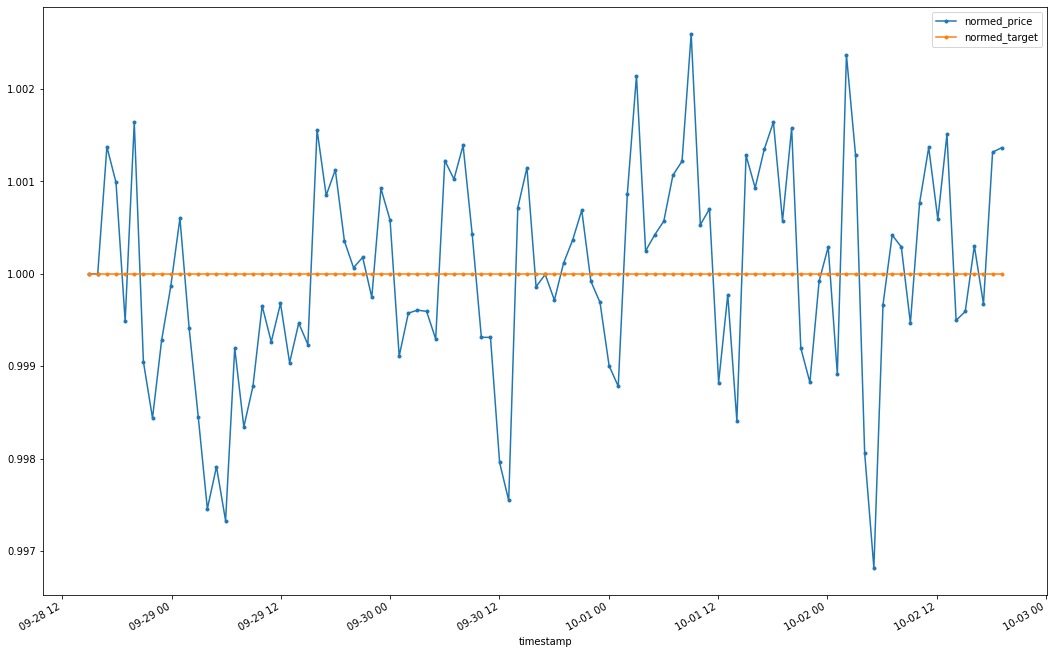

In [5]:
plt.figure(figsize=(18, 12))
rdf.plot(x='timestamp', y=['normed_price','normed_target'], marker='.', ax=plt.gca())

In the above plot, we show our martingle process or random walk, for price and compare to the target, which is stable. Below we show our martingale process code, as implemented in our cadCAD code.

In [6]:
from model.parts.system import martingale
function = inspect.getsource(martingale)
print(function)

def martingale(params, step, sL, s):

    theta = params['correction_wt']
    noise = np.random.randn()*params['noise_wt']
    raw_price = float(s['price'])/params['TOK']
    raw_target = float(s['target'])/params['TOK']

    raw_price = theta*raw_target+(1-theta)*raw_price + noise
    
    return({'raw_price':raw_price})



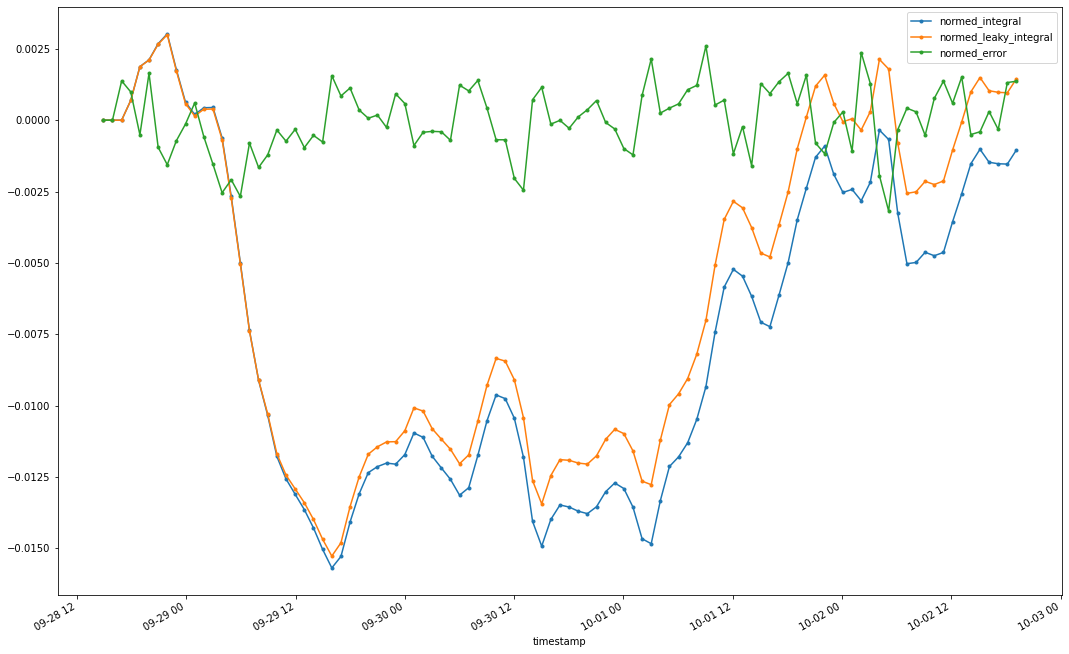

In [7]:
plt.figure(figsize=(18, 12))
rdf.plot(x='timestamp', y=['normed_integral', 'normed_leaky_integral','normed_error'], marker='.', ax=plt.gca())

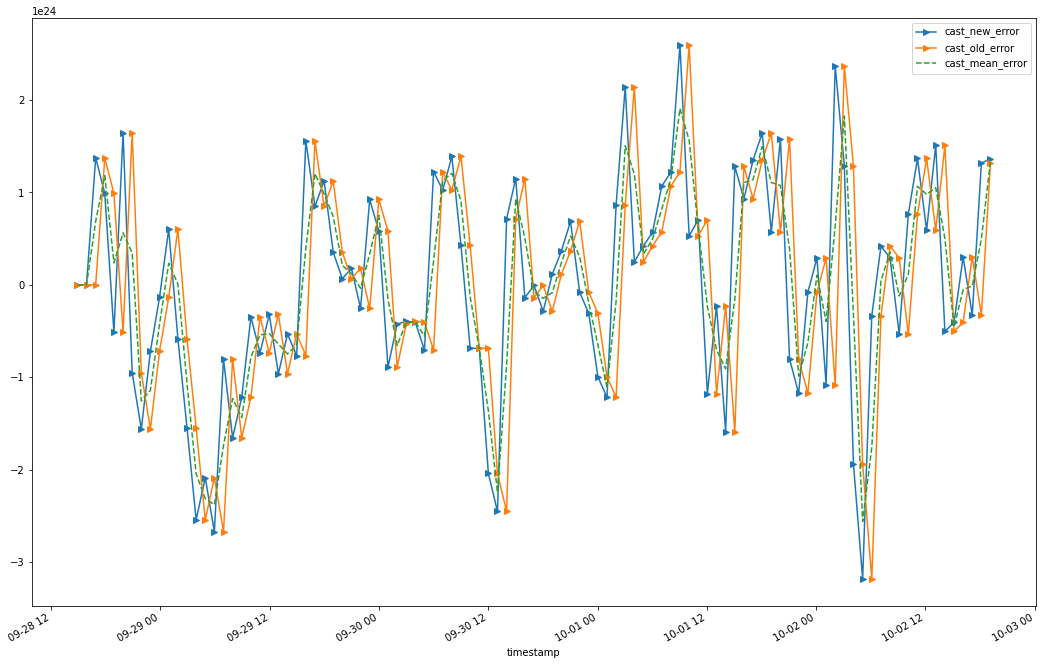

In [8]:
plt.figure(figsize=(18, 12))
rdf[['cast_new_error','cast_old_error','timestamp']].plot(x='timestamp', marker='>', ax=plt.gca())
rdf[['cast_mean_error','timestamp']].plot(x='timestamp', marker=None, linestyle='--', ax=plt.gca())

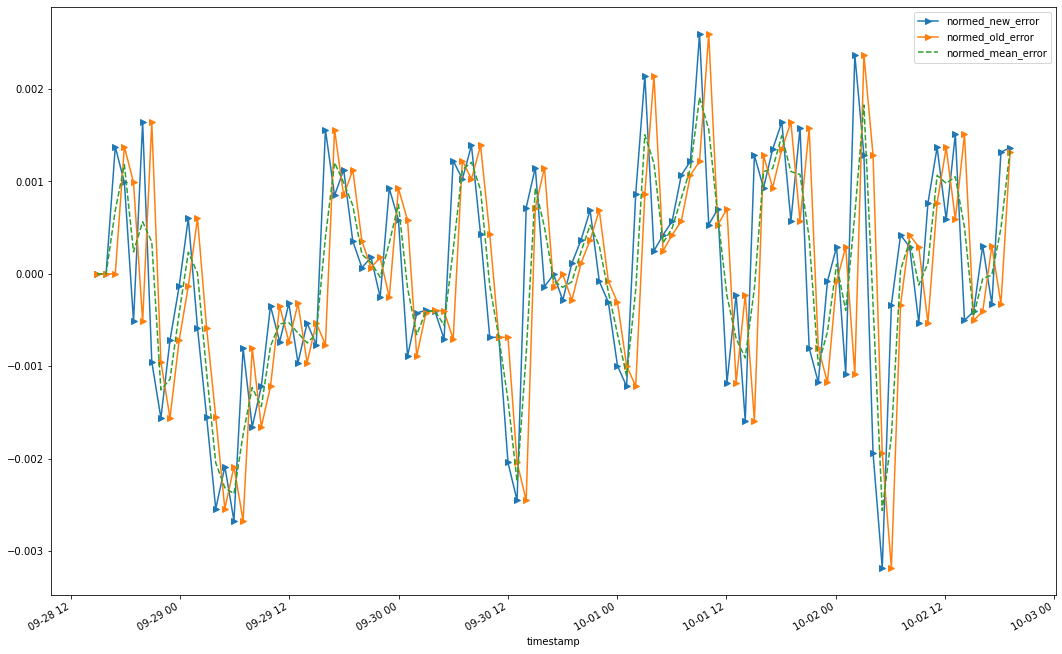

In [9]:
plt.figure(figsize=(18, 12))
rdf[['normed_new_error','normed_old_error','timestamp']].plot(x='timestamp', marker='>', ax=plt.gca())
rdf[['normed_mean_error','timestamp']].plot(x='timestamp', marker=None, linestyle='--', ax=plt.gca())

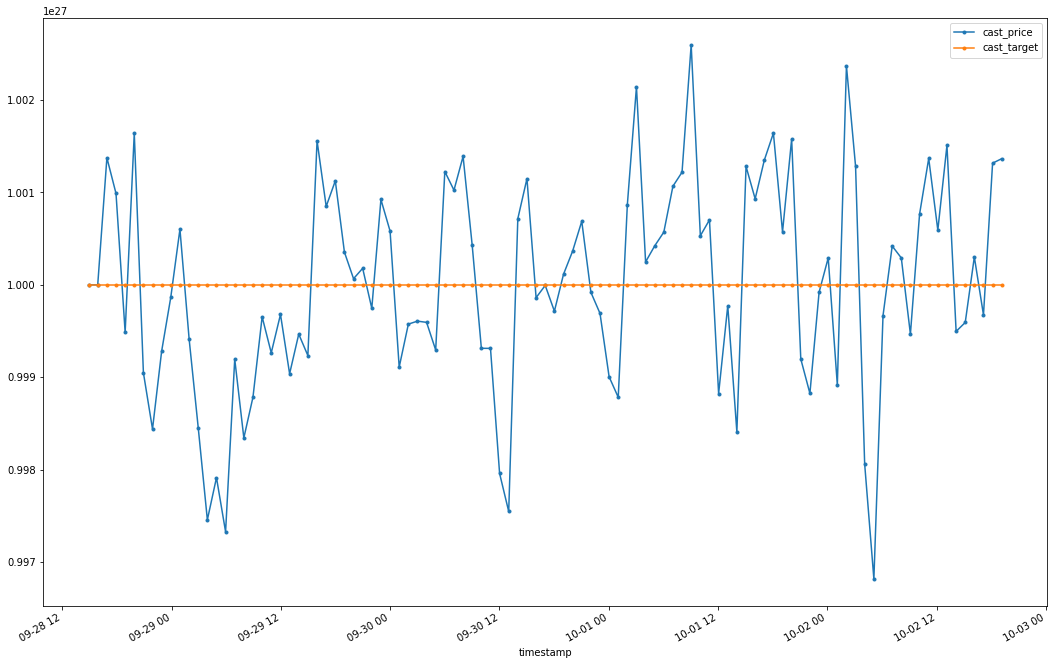

In [10]:
plt.figure(figsize=(18, 12))
rdf.plot(x='timestamp', y=['cast_price','cast_target'], marker='.', ax=plt.gca())

Text(0, 0.5, 'Observed Error in 1/RAY')

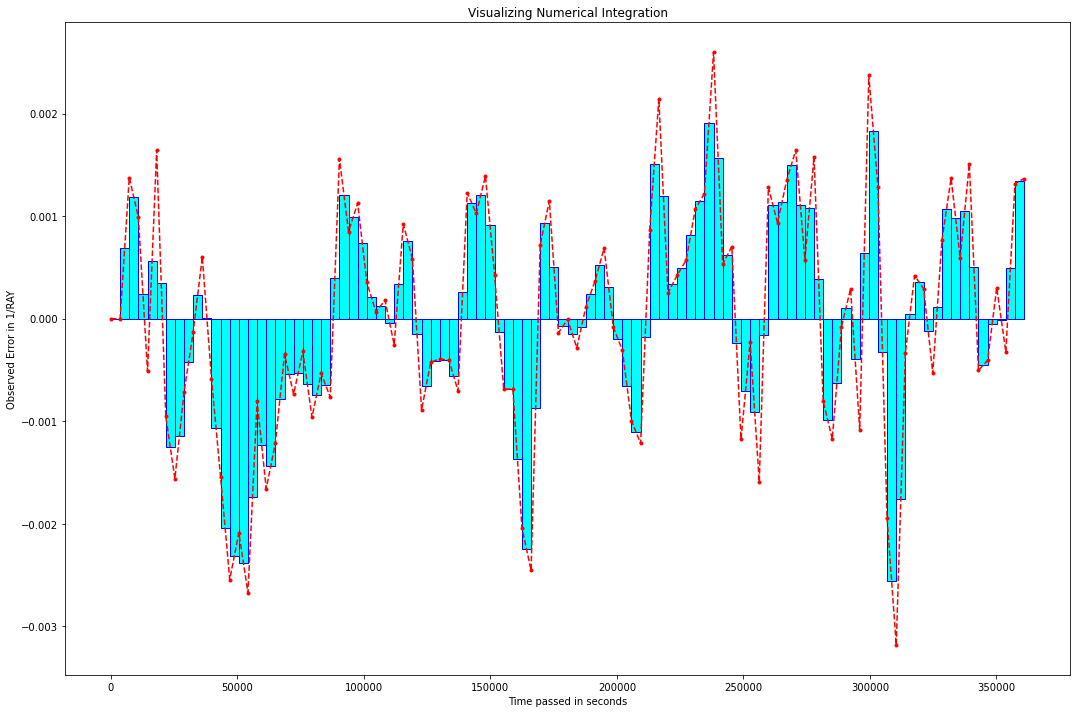

In [11]:
rdf['seconds'] = rdf.Dt.cumsum()


x=rdf.seconds.values
y=rdf.normed_error.values
h=rdf.normed_mean_error.values
w=rdf.Dt.values

plt.figure(figsize=(18, 12))
plt.plot(x,y , marker='.',linestyle='--', color='r')

ax = plt.gca()

for p in range(len(x)-1):
    ax.add_patch(
        Rectangle(
        (x[p], 0),
        w[p+1],
        h[p+1],
        edgecolor = 'blue',
        facecolor = 'cyan',
        fill=True
     ) )

plt.title('Visualizing Numerical Integration')
plt.xlabel('Time passed in seconds')
plt.ylabel('Observed Error in 1/RAY')


Text(0, 0.5, 'Observed Error in large integer form')

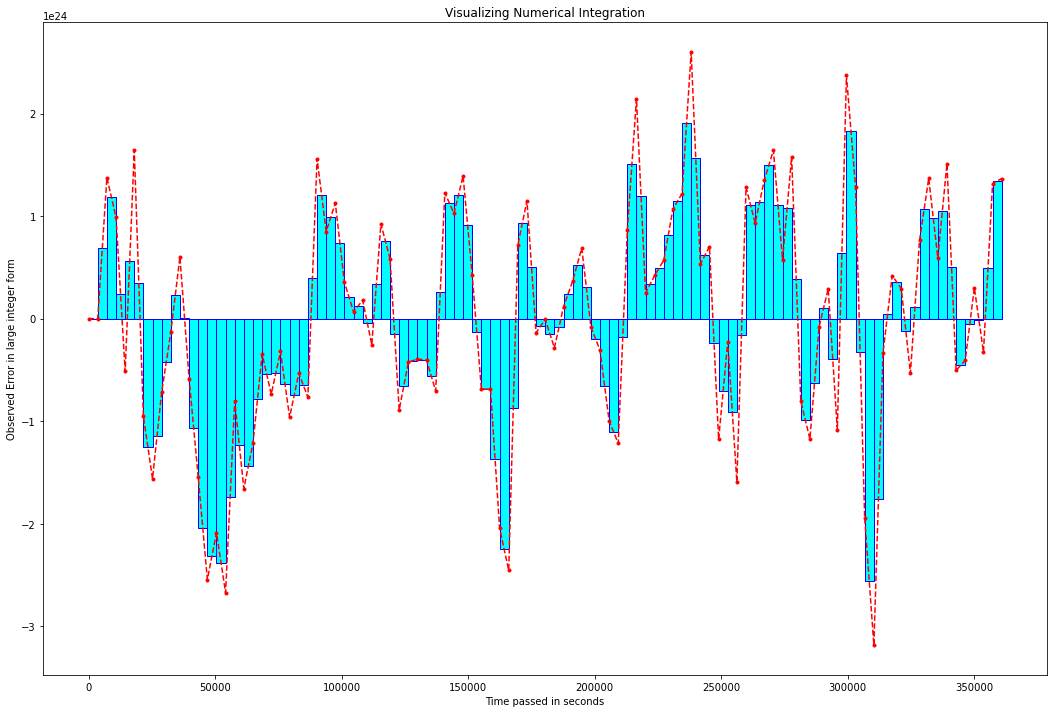

In [12]:
rdf['seconds'] = rdf.Dt.cumsum()


x=rdf.seconds.values
y=rdf.normed_error.apply(lambda x: float(x*sys_params.initial_values['TOK'])).values
h=rdf.normed_mean_error.values
w=rdf.Dt.values

plt.figure(figsize=(18, 12))
plt.plot(x,y , marker='.',linestyle='--', color='r')

ax = plt.gca()

for p in range(len(x)-1):
    ax.add_patch(
        Rectangle(
        (x[p], 0),
        w[p+1],
        int(h[p+1]*sys_params.initial_values['TOK']),
        edgecolor = 'blue',
        facecolor = 'cyan',
        fill=True
     ) )

plt.title('Visualizing Numerical Integration')
plt.xlabel('Time passed in seconds')
plt.ylabel('Observed Error in large integer form')

## Conclusion
In this notebook, we've provided an overview of integration and numerical integration, created a cadCAD model to illustrate numerical integration, ran the simulation, plotted and analysed the results.